In [0]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')

Using TensorFlow backend.






553467904/553467096 [==============================] - 6s 0us/step




96116736/96112376 [==============================] - 1s 0us/step


In [0]:
from google.colab import files
uploaded=files.upload()

Saving download.jpg to download.jpg


In [0]:
!ls

download.jpg  sample_data


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
from PIL import Image
jpgfile = Image.open("download.jpg")
 
print(jpgfile.bits, jpgfile.size, jpgfile.format)

8 (275, 183) JPEG


In [0]:
filename = 'images/cat.jpg'
# load an image in PIL format

original = load_img(jpgfile, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

AttributeError: ignored

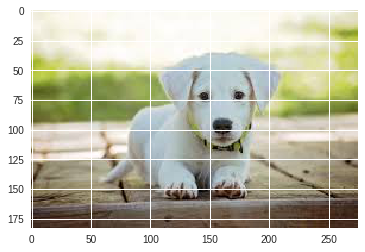

numpy array size (183, 275, 3)


In [0]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image batch size (1, 183, 275, 3)


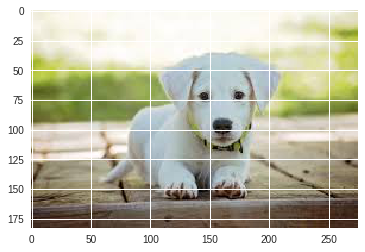

In [0]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [0]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print (label)

ValueError: ignored